Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.


Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

1. Crosstab Analysis:

    Create a crosstab between the product category and the isBestSeller status.

    Are there categories where being a best-seller is more prevalent?

    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
amazon_uk_prod = pd.read_csv("../datasets/amz_uk_price_prediction_dataset.csv")

In [3]:
amazon_uk_prod.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
crosstab_result = pd.crosstab(amazon_uk_prod["category"], amazon_uk_prod["isBestSeller"])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [28]:
bestseller_rate = (
    amazon_uk_prod.groupby('category')['isBestSeller']
    .mean()
    .reset_index()
    .rename(columns={'isBestSeller': 'bestseller_proportion'})
    .sort_values(by='bestseller_proportion', ascending=False)
)
bestseller_rate['bestseller_percentage'] = (bestseller_rate['bestseller_proportion'] * 100).round(2)
bestseller_rate

,category,bestseller_proportion,bestseller_percentage
109,Grocery,0.058135,5.81
254,Smart Home Security & Lighting,0.057692,5.77
126,Health & Personal Care,0.057686,5.77
185,Mobile Phone Accessories,0.042471,4.25
229,Power & Hand Tools,0.035339,3.53
...,...,...,...
230,Power Supplies,0.000000,0.00
249,Ski Helmets,0.000000,0.00
248,Ski Goggles,0.000000,0.00
259,Snowboard Boots,0.000000,0.00


2. Statistical Tests:

    Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    Compute Cramér's V to understand the strength of association between best-seller status and category.

3. Visualizations:

    Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [33]:
top_categories = (
    amazon_uk_prod['category'].value_counts()
    .nlargest(10)
    .index
)

filtered_df = amazon_uk_prod[amazon_uk_prod['category'].isin(top_categories)]
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


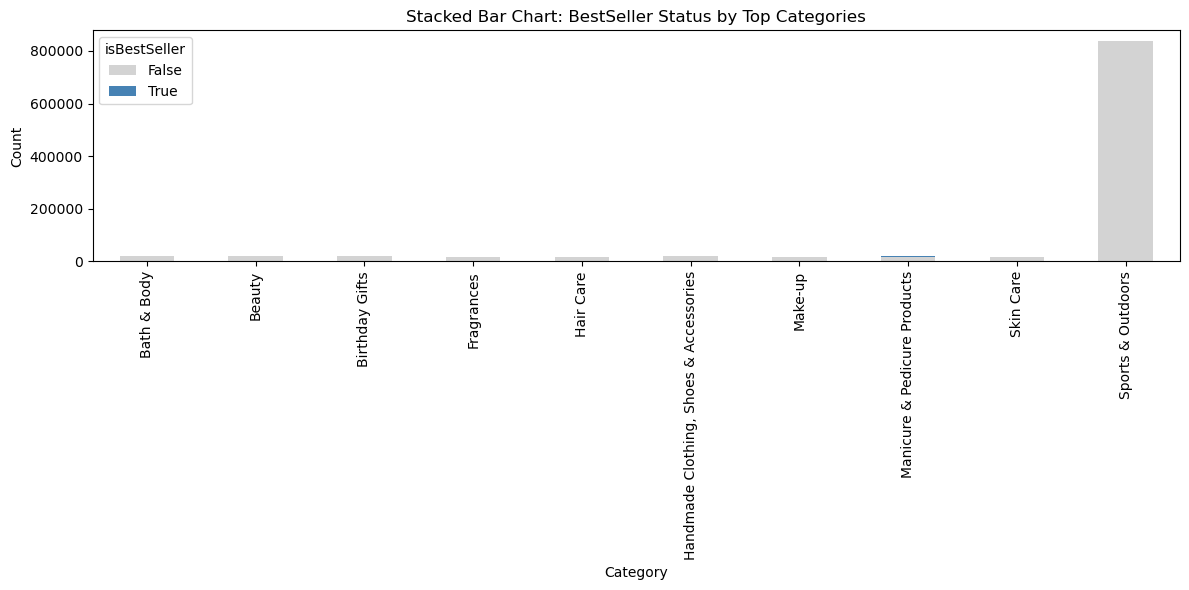

In [41]:
bestseller_crosstab = pd.crosstab(filtered_df['category'], filtered_df['isBestSeller'])

bestseller_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['lightgray', 'steelblue']
)

plt.title('Stacked Bar Chart: BestSeller Status by Top Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='isBestSeller')
plt.tight_layout()
plt.show()


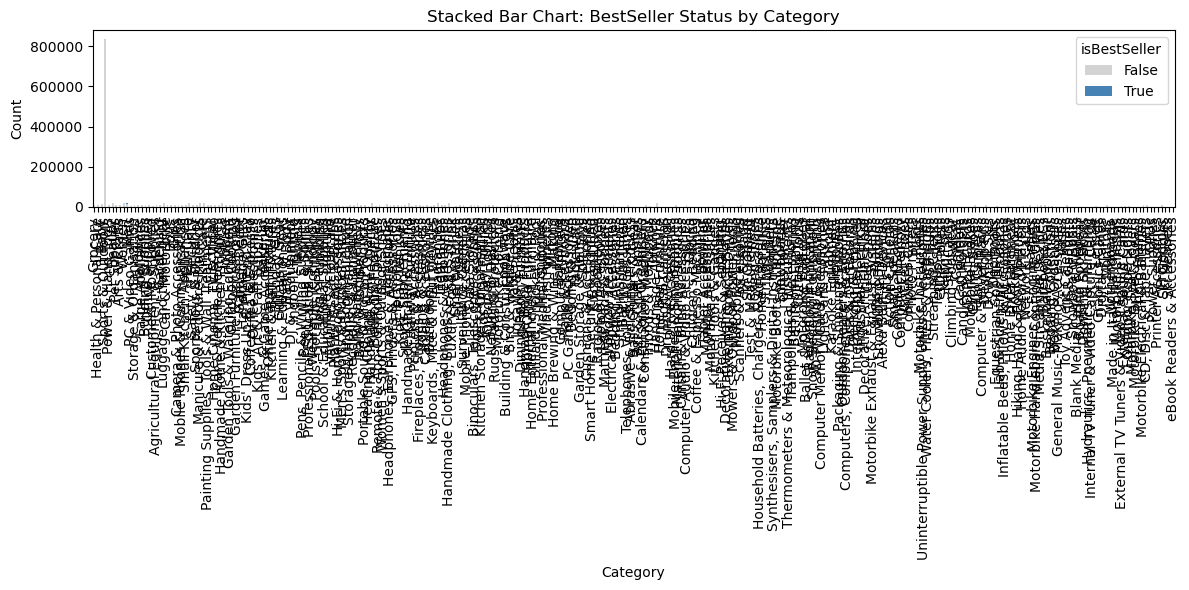

In [32]:
import matplotlib.pyplot as plt

# Optional: sort by total count or True proportion
bestseller_crosstab = crosstab_result.sort_values(by=True, ascending=False)

# Plot
bestseller_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightgray', 'steelblue'])

plt.title('Stacked Bar Chart: BestSeller Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='isBestSeller')
plt.tight_layout()
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [42]:
# Interquartile Range (IQR)
Q1 = amazon_uk_prod["price"].quantile(0.25)
Q3 = amazon_uk_prod["price"].quantile(0.75)
iqr = Q3 - Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

-44.01
99.99000000000001


In [61]:
df_no_outliers = amazon_uk_prod[
    (amazon_uk_prod['price'] >= lower_bound) &
    (amazon_uk_prod['price'] <= upper_bound)
]
df_no_outliers = df_no_outliers.reset_index(drop=True)
print("Original shape:", amazon_uk_prod.shape)
print("Filtered shape:", df_no_outliers.shape)



Original shape: (2443651, 10)
Filtered shape: (2115963, 10)


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.



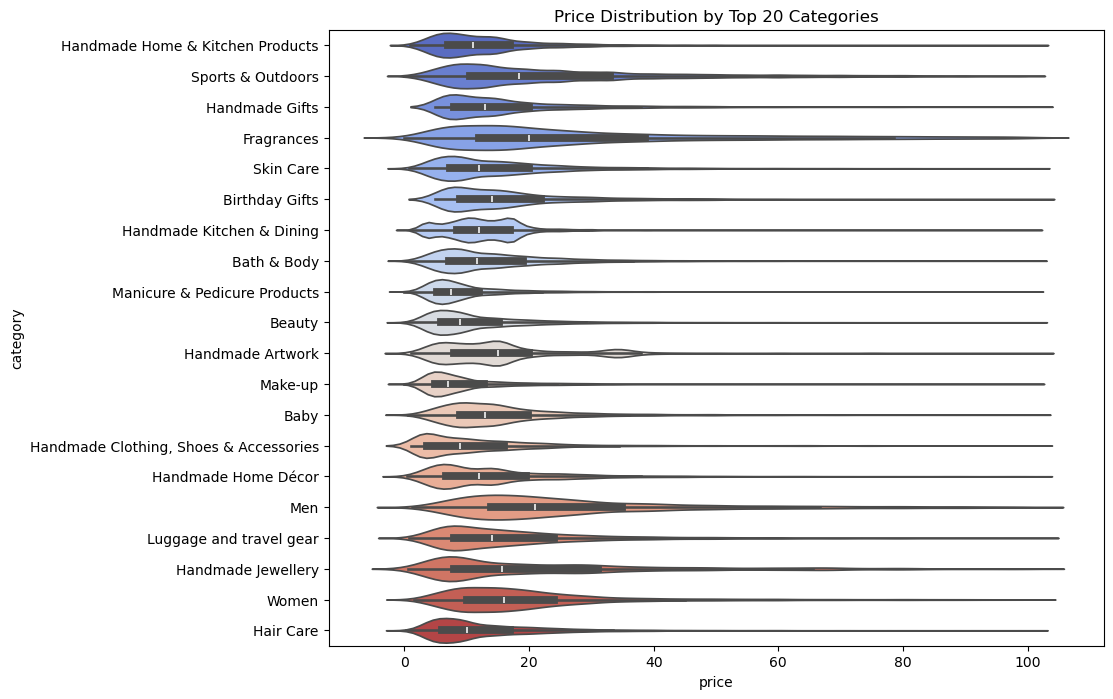

In [72]:
def get_top_n_categories(df, column='category', n=20):
    top_n = df[column].value_counts().nlargest(n).index
    filtered_df = df[df[column].isin(top_n)]
    return top_n, filtered_df

# Top 20 categories
# df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]
cat_top20, df_top20  = get_top_n_categories(df_no_outliers, n=20)

plt.figure(figsize=(10, 8))
sns.violinplot(data=df_top20, x='price', y='category', palette="coolwarm", hue='category')
plt.title("Price Distribution by Top 20 Categories")
plt.show()

In [ ]:
median_price = (
    df_no_outliers.groupby('category')['price']
    .median()
    .reset_index()
    .rename(columns={'price': 'price_proportion'})
    .sort_values(by='price_proportion', ascending=False)
)
median_price

,category,price_proportion
75,Desktop PCs,74.00
34,Boxing Shoes,69.79
274,Tablets,69.00
108,Graphics Cards,68.54
190,Motherboards,67.92
...,...,...
4,Adapters,7.05
176,Make-up,7.00
246,Signs & Plaques,6.99
8,Arts & Crafts,5.99


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.



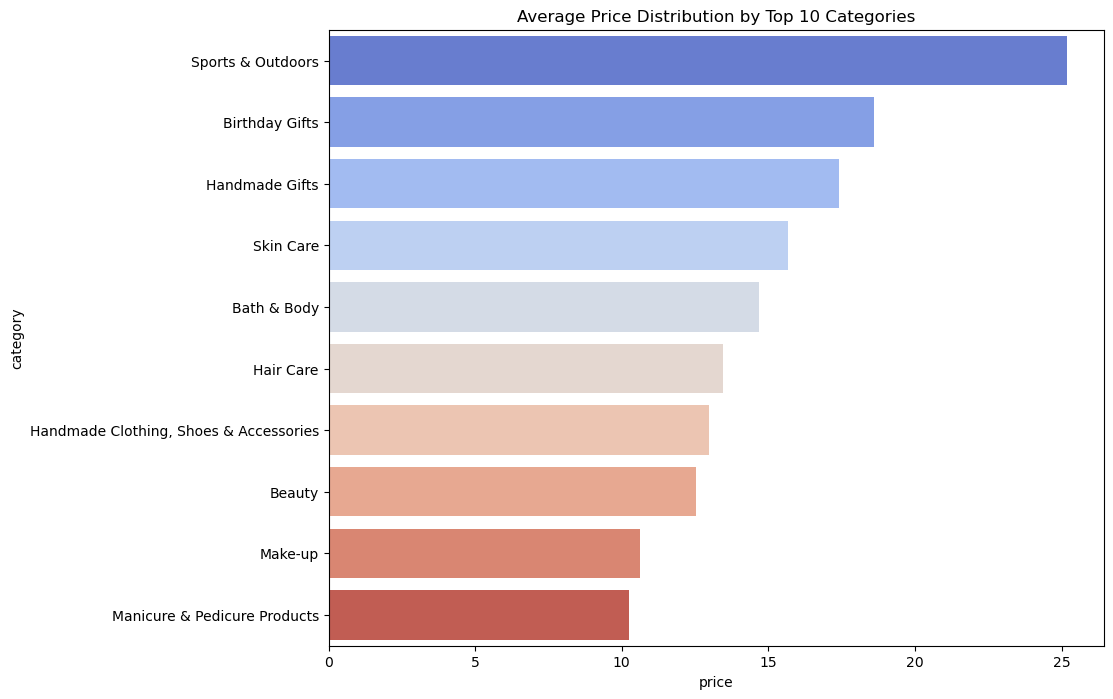

In [76]:
# Top 10 categories with data
_, df_top10 = get_top_n_categories(df_no_outliers, n=10)

average_price = (
    df_top10.groupby('category')['price']
    .mean()
    .reset_index()
    .sort_values(by='price', ascending=False)
)
average_price


plt.figure(figsize=(10, 8))
sns.barplot(data=average_price, x='price', y='category', palette="coolwarm", hue='category')
plt.title("Average Price Distribution by Top 10 Categories")
plt.show()

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

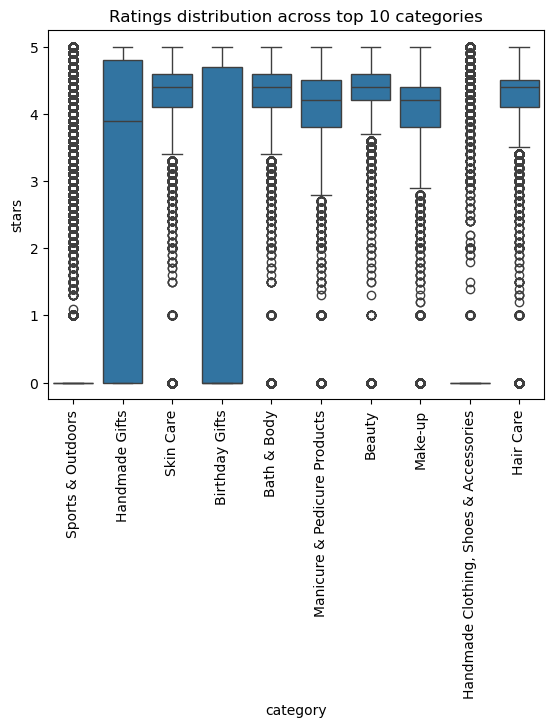

In [80]:

sns.boxplot(data=df_top10,
            x='category', y='stars')
plt.xticks(rotation=90)
plt.title("Ratings distribution across top 10 categories")
plt.show()

In [81]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings

corr = df_no_outliers[['price','stars']].corr()
print(corr)

          price     stars
price  1.000000 -0.077673
stars -0.077673  1.000000


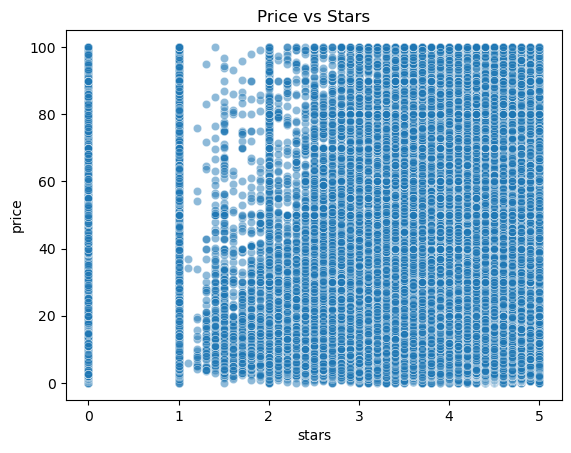

In [82]:
sns.scatterplot(data=df_no_outliers, x='stars', y='price', alpha=0.5)
plt.title("Price vs Stars")
plt.show()

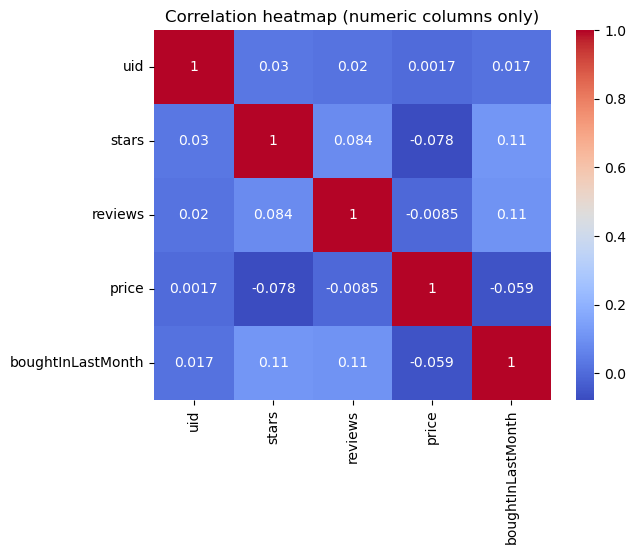

In [84]:
num_df = df_no_outliers.select_dtypes(include='number')
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap (numeric columns only)")
plt.show()

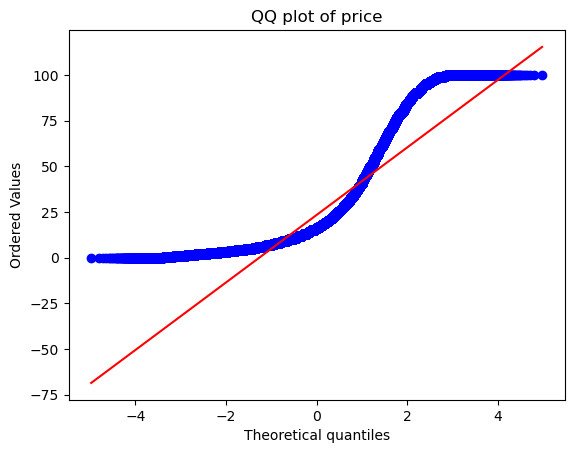

In [85]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ plot of price")
plt.show()